# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:160%;text-align:center;border-radius:12px 12px;">Customer Segmentation</p>

**Autor: Marcelo Cruz**<br>
Feel free to contact me. I'll appreciate your feedback! https://www.linkedin.com/in/marcelo-cruz-segura/


# Table of Content
* [1. Business Understanding](#1)

* [2. Prepare Work Enviroment](#2)

* [3. Load and inspect data](#3)

* [4. Exploratory Data Analysis](#4)

* [5. Preprocessing the data](#5)

* [6. Modeling](#6)

* [7. Explore the clusters results](#7)

<img src='https://raw.githubusercontent.com/CeloCruz/CustomerSegmentation/main/Customer_banner.png'>

<a id="1"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">1. Business Understanding</p>


## 1.1 Problem Statement
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments.<br>For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze<br>which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Target**:<br>
* **Goal from a business perspective:** understand its customers and makes it easier for them to modify products according to the specific needs,<br> behaviors and concerns of different types of customers.<br><br>
* **Goal from a Data Scientist perspective:** By delving into advanced clustering and thorough data analysis, our objective is to uncover customer segments using machine learning while also garnering valuable business insights.


**Source**:<br>
* The dataset for this project is provided by Dr. Omar Romero-Hernandez.

## 1.2 Performance measure
In unsupervised learning, performance assessment often involves a combination of qualitative and quantitative methods. Two notable quantitative techniques are:

1. **Silhouette Score:** A metric that quantifies cluster separation, with higher scores indicating better-defined clusters.
2. **Elbow Method:** Helps determine the optimal number of clusters by analyzing how cluster cohesion varies with the number of clusters.

These quantitative methods complement qualitative approaches like data visualization and manual analysis to comprehensively evaluate the outcomes of unsupervised learning.


## 1.3 Data dictionary
| Attributes | Description|
|------------|------------|
|People                  |                   
|ID|Customer's unique identifier
|Year_Birth|Customer's birth year
|Education|Customer's education level
|Marital_Status| Customer's marital status
|Income| Customer's yearly household income
|Kidhome| Number of children in customer's household
|Teenhome| Number of teenagers in customer's household
|Dt_Customer| Date of customer's enrollment with the company
|Recency| Number of days since customer's last purchase
|Complain| 1 if the customer complained in the last 2 years, 0 otherwise
|MntWines| Amount spent on wine in last 2 years
|MntFruits| Amount spent on fruits in last 2 years
|MntMeatProducts| Amount spent on meat in last 2 years
|MntFishProducts| Amount spent on fish in last 2 years
|MntSweetProducts| Amount spent on sweets in last 2 years
|MntGoldProds| Amount spent on gold in last 2 years
|NumDealsPurchases| Number of purchases made with a discount
|AcceptedCmp1| 1 if customer accepted the offer in the 1st campaign, 0 otherwise
|AcceptedCmp2| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
|AcceptedCmp3| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
|AcceptedCmp4| 1 if customer accepted the offer in the 4th campaign, 0 otherwise
|AcceptedCmp5| 1 if customer accepted the offer in the 5th campaign, 0 otherwise
|Response| 1 if customer accepted the offer in the last campaign, 0 otherwise
|NumWebPurchases| Number of purchases made through the company’s website
|NumCatalogPurchases| Number of purchases made using a catalogue
|NumStorePurchases| Number of purchases made directly in stores
|NumWebVisitsMonth| Number of visits to company’s website in the last month

<a id="2"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">2. Prepare Work Enviroment</p>

**Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D 
from ipywidgets import interact
import seaborn as sns
import squarify
import warnings
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

**Suppress annoying warnings:**

In [2]:
warnings.filterwarnings('ignore')

**Display options:**

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

<a id="3"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">3. Load and inspect data</p>

In [4]:
url = 'https://raw.githubusercontent.com/CeloCruz/CustomerSegmentation/main/marketing_campaign.csv'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Size of the dataset:**

In [5]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 2240
Columns: 29


**Info about the dataset:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Initial Thoughts:</b><br>
        <ul>
            <li>Almost (26 out of 29) all the columns are numeric variables.</li>
            <li>Just one column (Income) has missing values, and it's a small amount.<br>
            We can just drop those rows or impute it using `KNNImputer` or `IterativeImputer`.</li>
            <li>Drop the "ID" column since there might be a unique value for each row.</li>
            <li>Transform the type format of "Dt_customer" column to datetime.</li>
            <li>Create an "age" column based on the most recent date in the "dt_customer" column.</li>
            <li>Seems like the rest of columns have an appropriate format.</li>
        </ul>
    </span>
</div>

**Are the object type columns categories?**

In [7]:
df.select_dtypes('object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

**Let's see some statistics about numerical columns**

In [8]:
df.describe(percentiles=[.05,.5,.25,.75,.95,.99])

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
5%,576.850000,1950.000000,18985.500000,0.000000,0.000000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
95%,10675.050000,1988.000000,84130.000000,1.000000,1.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,126.000000,165.050000,6.000000,9.000000,9.000000,12.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.0,11.0,1.000000
99%,11074.610000,1992.000000,94458.800000,2.000000,2.000000,98.000000,1285.000000,172.000000,915.000000,226.220000,177.220000,227.000000,10.000000,11.000000,10.610000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.0,11.0,1.000000


<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>We've identified outliers in nearly all columns. Although it seems to be very few records (higher than 99th percentile)</li>
            <li>"Z_CostContact" and "Z_Revenue" don't contribute any meaningful insights; thus, we'll remove these columns.</li>
            <li>Approximately 95% of customers have either 1 or 0 teenagers or children in their households.<br>
                We can create a new column called "YoungHome" aggregating these two variables, and see if we obtain more interesting information.</li>
            <li>There are no customers recorded in the database with an absence of purchases lasting over 100 days.</li>
            <li>The most recent campaign (Response Column) garnered the highest acceptance rate.</li>
            <li>Meat and wine stand out as the most lucrative products (with big difference over the rest).</li>
        </ul>
    </span>
</div>


**Do we have duplicated records?**

In [9]:
print("Duplicated records:",df.duplicated().sum())

Duplicated records: 0


## 2.2 Logic Inspection
During this stage, our primary aim is to conduct a comprehensive examination, all while maintaining a practical and<br> business-oriented perspective. This will be followed by delving into more advanced statistical analyses.

Our overarching goal is to conduct an initial assessment of all columns and extract preliminary insights for forthcoming<br>EDA and feature engineering endeavors.

In [10]:
df.Education.value_counts(dropna=False, normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [11]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

In [12]:
last_year = pd.to_datetime(df.Dt_Customer).dt.year.max()
print("We'll calculate the age of the customers based on this year: ",last_year)

We'll calculate the age of the customers based on this year:  2014


<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>About 88% of our customers have graduated or more, which gives us a pretty good hint about the age ranges we might be looking at.</li>
            <li>Substitute "Alone" with "Single."</li>
            <li>It appears that certain individuals did not respond positively to inquiries regarding this matter.<br>
                Should we ascertain that this particular column lacks a substantial amount of informative value, it may be prudent to contemplate its omission.</li>
        </ul>
    </span>
</div>


<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Feature Engineering:</b><br>
        <ul>
            <li>An approach could involve categorizing instances labeled "YOLO" and "Absurd" as "Single".</li>
            <li>Simplify `Marital Status`column, categorizing with "Partner" or "Not Partner"</li>
            <li>Same approach for `Graduated`column, categorize it in "Graduted" or "Not Graduated".</li>
        </ul>
    </span>
</div>


<a id="4"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">4. Exploratory Data Analysis</p>

Considering the limited availability of comprehensive customer demographic data, our analysis will
predominantly revolve around their purchasing behavior. We plan to amalgamate various variables related
to their habits to extract potentially valuable insights.

In [13]:
# Let's make a copy of the dataset
df_copy = df.copy()

**Let's apply our initial data cleaning describe it above**

In [14]:
def initial_cleaning(df):
    """Do the initial changes describe it above"""
    # Drop columns 
    df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
    # Transform the format of dt_customer
    df.loc[:,'Dt_Customer'] = pd.to_datetime(df.loc[:,'Dt_Customer'],format="%d-%m-%Y")
    # Substitutions in Marital Status column
    df.loc[:,'Marital_Status'] = df.loc[:,'Marital_Status'].str.replace('Alone','Single')
    df.loc[:,'Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    # Rename columns for more practicity
    df.columns = df.columns.str.lower()
    # Create new column
    df['younghome'] = df.kidhome + df.teenhome
    return df

df_copy = initial_cleaning(df_copy)

In [15]:
def feat_engineering(df):
    not_graduated = ['Basic','2n cycle']
    couple = ['Married','Together']
    df['age'] = max(df['dt_customer'].dt.year) - df['year_birth']
    df['graduated'] = df['education'].apply(lambda x: 'Not Graduated' if x in not_graduated else 'Graduated')
    df['partner'] = df['marital_status'].apply(lambda x: 'Partner' if x in couple else 'No Partner')
    return df

df_copy = feat_engineering(df_copy);

**Set theme for further visualizations**

In [16]:
sns.set_theme(context= 'notebook')
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('mako')

**Some plot functions:**

In [17]:
def num_plot(df, col):
  """Graph an histogram with a boxplot above
	for one numerical column"""
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax 

def countplot_catcols(df,column,width,height):
	"""Count frequency for each group"""
	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df, 
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):
  """Plot a barplot"""
  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

## 4.1 What's the demographic profile of our customers?

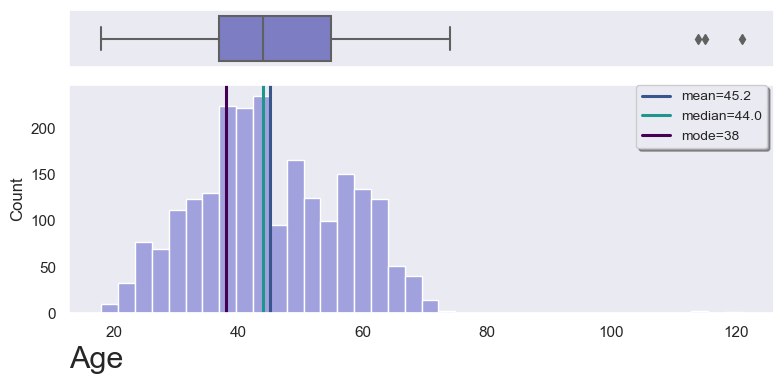

In [18]:
num_plot(df_copy, 'age')
plt.show()

**Discretize `year_birth` column**

In [19]:
age_clusters = pd.cut(df_copy.age, [-np.inf,30,60,np.inf], 
                      labels=['young','adult','elderly'])
age_clusters.value_counts(normalize=True).sort_index()

young      0.115625
adult      0.764286
elderly    0.120089
Name: age, dtype: float64

In [20]:
df_copy['age_category'] = age_clusters

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Approximately 76% of our customer base have between 30 and 60. This indicates that the
                predominant age group among our customers falls within the adult category.</li>
            <li>The data demonstrates a distribution that's relatively normal but skewed to the left. Mainly due to the outlier.</li>
        </ul>
    </span>
</div>


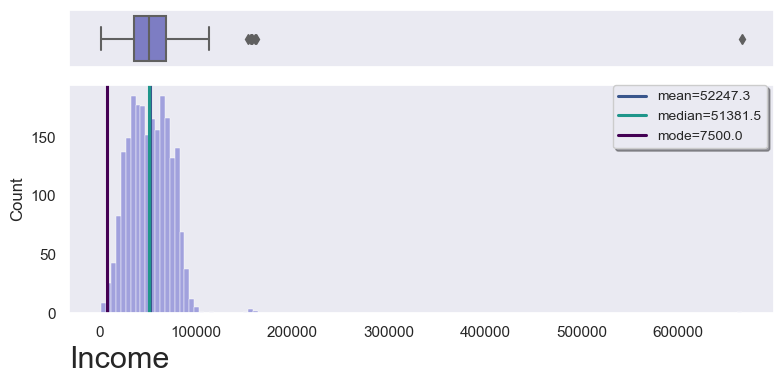

In [21]:
num_plot(df_copy, 'income')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>The data shows a distribution that's relatively normal but skewed to the right.<br>
                This kind of distribution is quite common when analyzing incomes.</li>
        </ul>
    </span>
</div>


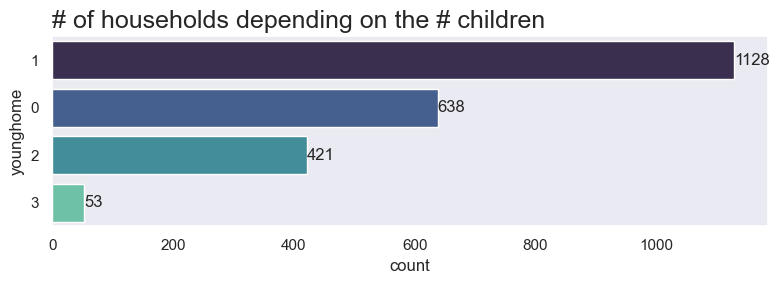

In [22]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='younghome', data=df_copy, 
                  palette='mako',
                  orient='h',
				  order = df_copy['younghome'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('# of households depending on the # children', loc='left', size=18)
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>It's noticeable that a substantial portion of customers in the dataset have only one or fewer young individuals (teenagers or children) at home. This observation aligns with what we've seen previously – a larger percentage of our customers fall within the age range of 40s to 60s. This implies that in many households, their children (or young individuals under their care) have already become independent.</li>
        </ul>
    </span>
</div>


**Exclude outliers for a more detail view**

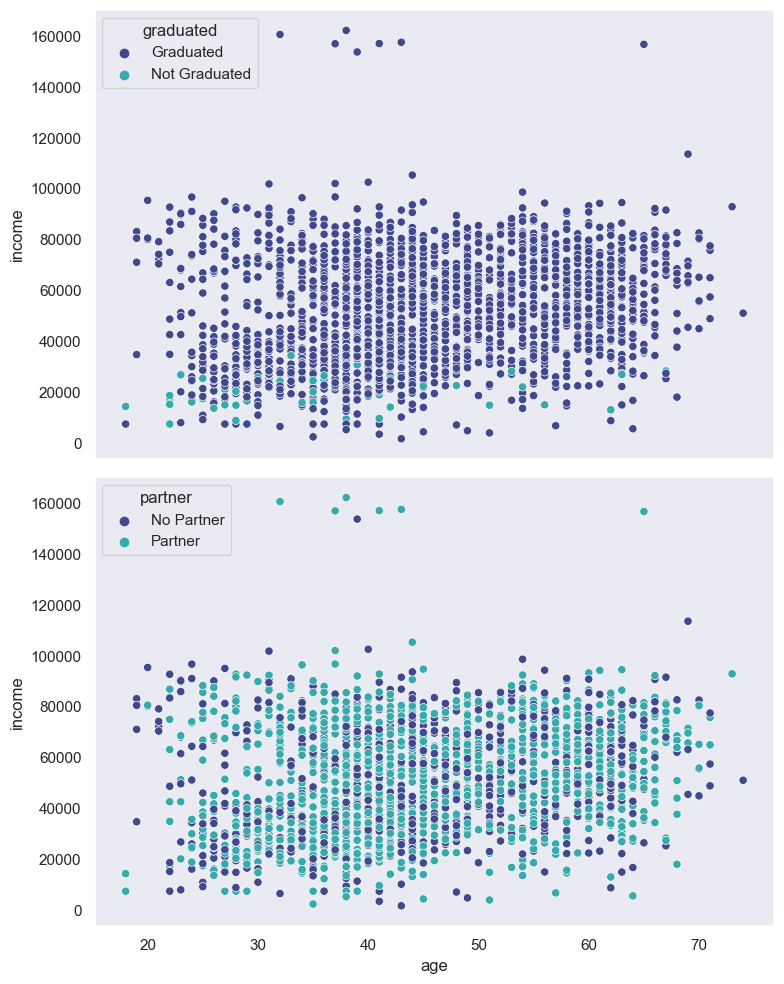

In [23]:
df_without_outliers = df_copy.loc[(df_copy.age < 100) & (df_copy.income < 200_000)]

fig, ax = plt.subplots(2,1, figsize=(8,10), sharex=True)
sns.scatterplot(data=df_without_outliers, 
                x='age', 
                y='income',
                hue='graduated', 
                palette='mako',
               ax=ax[0])

sns.scatterplot(data=df_without_outliers, 
                x='age', 
                y='income',
                hue='partner', 
                palette='mako',
               ax=ax[1])
plt.tight_layout()
plt.show()

* We can't appreciate any significant pattern due to the overlap.

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestion:</b><br>
        Considering the limited sample size of the young category, it might be beneficial to gather more data from that segment to gain a clearer understanding of their preferences and behaviors. This additional information could then be used to refine marketing strategies for both the young and elderly demographics.
    </span>
</div>


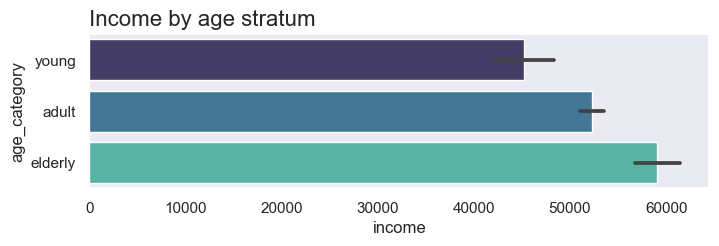

In [24]:
barplot_category(df_copy,'income','age_category','Income by age stratum')
plt.show()

## 4.2 Which patterns can we find in their spending behavior?

**What kind of relation is between customers and what they purchase?**

In [25]:
# Select only a few features of interest at this moment
purchase = pd.concat([df_copy.loc[:, :'mntgoldprods'].drop(['kidhome','teenhome','year_birth'], axis=1),
                     df_copy[['age','age_category','partner']]], 1)

# Create a new column with the total amount of products pruchased
purchase['mnttotal'] = purchase.loc[:,'mntwines':'mntgoldprods'].sum(1)

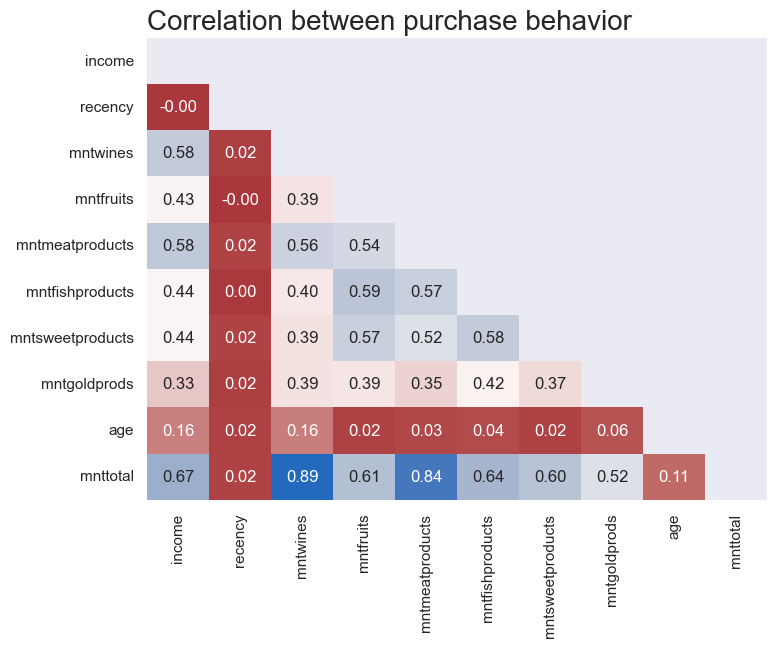

In [26]:
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchase.corr(), dtype=bool))
sns.heatmap(purchase.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Correlation between purchase behavior', size=20, loc='left')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Individuals with higher incomes tend to invest more in wines and meats, which happen to be our most profitable product categories.</li>
            <li>There's a strong correlation between meat and wines purchasing and the overall amount spent by a customer.</li>
            <li>Customers who allocate more of their budget to fruits also show a tendency to buy fish and sweet products.</li>
        </ul>
    </span>
</div>


<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestions:</b><br>
        <ol>
            <li>Create a tiered loyalty program to reward high-income customers who invest in wines and meats, our most profitable categories.</li>
            <li>Develop bundled offers that combine meat and wine purchases to leverage their correlation with higher spending.</li>
            <li>Craft themed packages like the "Balanced Delights Box," featuring fruits, fish, and sweet products, to cater to varied tastes.</li>
        </ol>
        This strategy capitalizes on customer preferences, driving sales in key categories while offering exclusive benefits and diverse product experiences.
    </span>
</div>


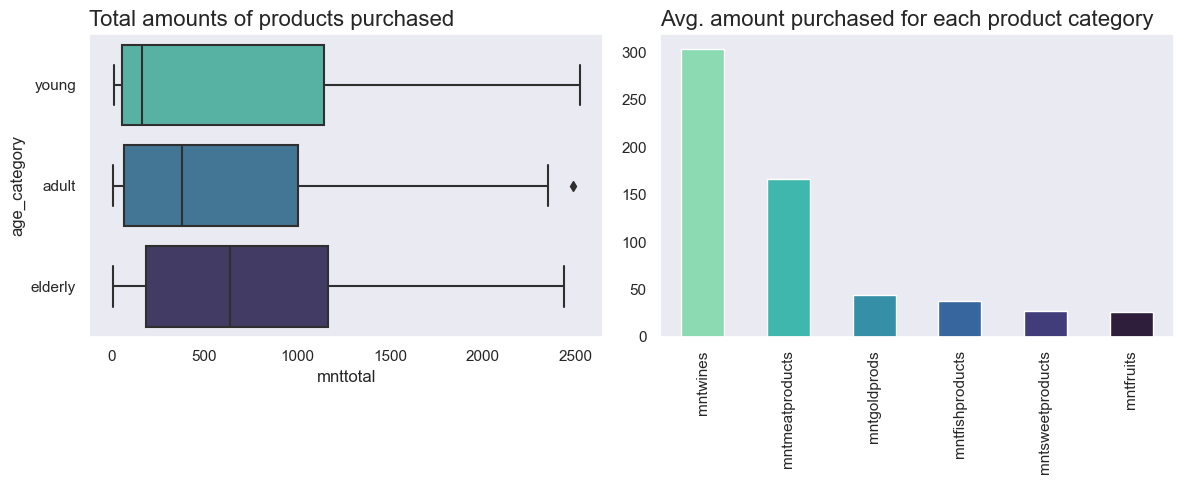

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='mnttotal', 
            y='age_category', 
            data=purchase, 
            palette='mako_r', 
            linewidth=1.5,
           ax=ax[0])
ax[0].set_title('Total amounts of products purchased', loc='left', size=16)

df_copy.loc[:,'mntwines':'mntgoldprods'].mean().sort_values(ascending=False)\
    .plot(kind='bar', 
          color=sns.color_palette('mako_r'),
         ax=ax[1])
ax[1].set_title('Avg. amount purchased for each product category', size=16, loc='left')

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>It's evident that there's a correlation between the quantity of products bought and the customer's age, which in turn is linked to their income. Generally, higher age corresponds to higher income and greater product purchases.</li>
            <li>As we noticed before, there's definitely a clear winner when it comes to sales. However, even though the quantity of meat products is nearly half, they still boast impressive numbers as well.</li>
        </ul>
    </span>
</div>


**Add `Total amount` column to the dataframe**

In [28]:
df_copy['mnttotal'] = df_copy.loc[:,'mntwines':'mntgoldprods'].sum(1)

**Let's see the distribution of total amount purchased**

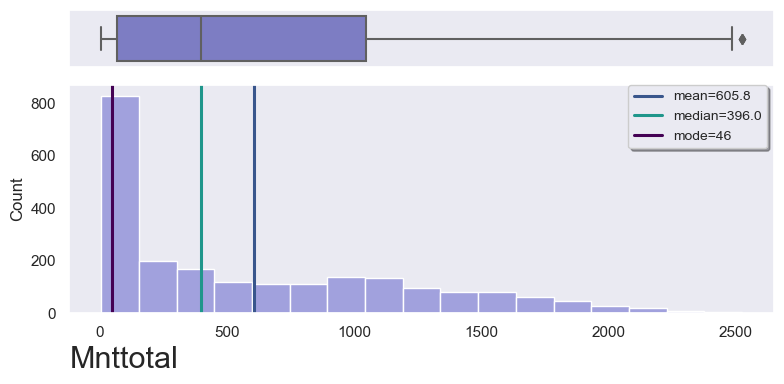

In [29]:
num_plot(purchase,'mnttotal')
plt.show()

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestion:</b><br>
        Considering the insights derived from the long tail distribution, where approximately 25% of customers fall within the lower range of total products purchased, a promising business strategy could involve a shift in focus towards the remaining 75% of customers. This majority segment presents a significant opportunity for targeted marketing efforts and personalized engagement.
    </span>
</div>

**Is this phenomenon occurring due to the fact that older individuals joined the company earlier?**

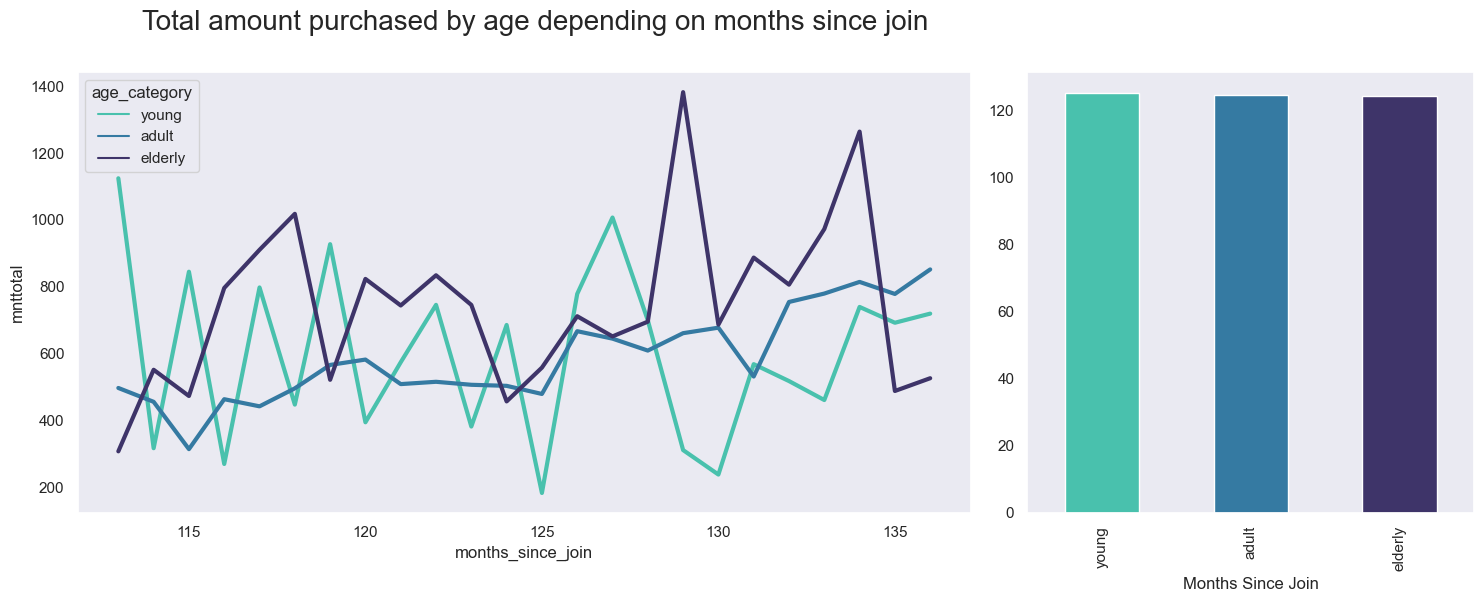

In [30]:
purchase['months_since_join'] = ((datetime.now() - purchase['dt_customer']) / pd.Timedelta(days=30)).astype(int)
group_by_months = purchase.groupby(['months_since_join','age_category'])['mnttotal'].mean().reset_index()

fig, ax = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'width_ratios': [2, 1]})

sns.lineplot(x='months_since_join', 
             y='mnttotal', 
             data=group_by_months, 
             hue='age_category',
             ax=ax[0], 
             palette='mako_r',
            linewidth=3)

purchase.groupby('age_category')['months_since_join'].mean().plot(kind='bar', 
                                                                  color=sns.color_palette('mako_r',3),
                                                                  xlabel='Months Since Join',
                                                                 ax=ax[1])

plt.suptitle('Total amount purchased by age depending on months since join', 
             x=0.1, y=1.0, fontsize=20, ha="left")
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>The number of months since enrolling with the company doesn't seem to be the main factor affecting the amount of products purchased. It's evident that regardless of how many months ago individuals joined, adults consistently buy fewer products than elderly people. Moreover, there's an observable upward trend, indicating that on average, individuals who joined later have purchased more products.</li>
        </ul>
    </span>
</div>

**Is there a significant difference in spending behavior if we grouped by marital status?**

In [31]:
products = ['mntwines','mntfruits','mntmeatproducts',
            'mntfishproducts','mntsweetproducts','mntgoldprods','mnttotal']

purchase.groupby('partner')[products].mean().astype(int).style.background_gradient(cmap='vlag_r')

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,mnttotal
partner,,,,,,,
No Partner,306,27,172,38,28,46,620
Partner,302,25,163,36,26,42,597


In [32]:
temp_df = pd.pivot_table(purchase, index='partner', columns='age_category', values='mnttotal', aggfunc='mean')
print('Avg. Total amount purchased:')
temp_df.fillna(0).astype(int).style.background_gradient(cmap='vlag_r')

Avg. Total amount purchased:


age_category,young,adult,elderly
partner,,,
No Partner,605,609,696
Partner,554,576,776


<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Customers without a partner tend to spend more in most categories, except for wines, where the difference is minor. This is likely due to the inclusion of widowed customers in this group, who are typically older than 60 years and part of the higher-spending demographic.</li>
            <li><code>Age_Category</code> apparently might be a better predictor than <code>partner</code>.</li>
        </ul>
    </span>
</div>


## 4.3 Looking for patterns in purchasing channels

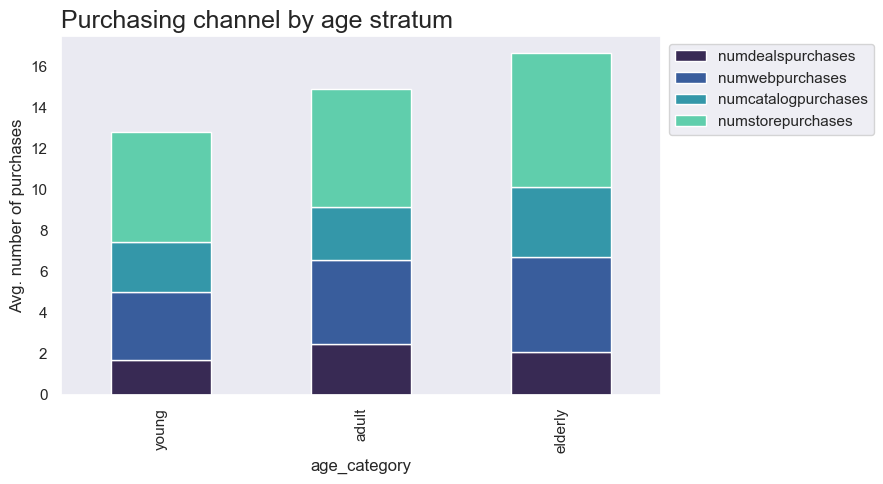

In [33]:
purchasing_channels = ['numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases']
fig, ax = plt.subplots(figsize=(9,5))
df_copy.groupby('age_category')[purchasing_channels].mean()\
                            .plot(kind='bar', ax=ax, stacked=True,
                            color=sns.set_palette('mako',4))

plt.title('Purchasing channel by age stratum', loc='left', size=18)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('Avg. number of purchases')
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Irrespective of the age group, purchases in the physical store evidently constitute the most commonly used purchasing channel.</li>
            <li>Contrary to our previous assumption, it's the elderly population that exhibits the highest mean in terms of web purchases (emerging as the second most frequently used channel).</li>
            <li>Deals and discounts purchases consistently rank as the least utilized channel across all age strata.</li>
        </ul>
    </span>
</div>


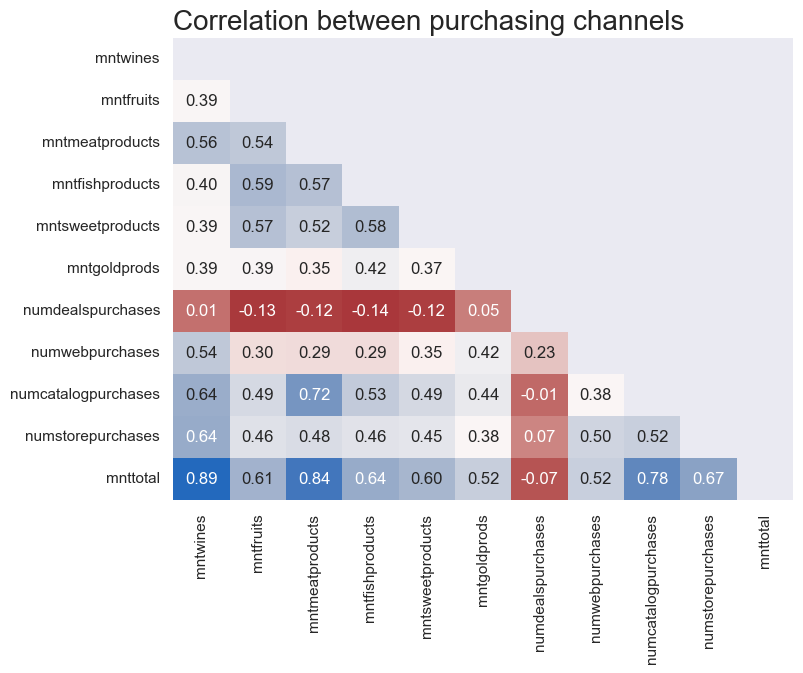

In [34]:
purchasing_channel = pd.concat([df_copy.loc[:,'mntwines':'numstorepurchases'], df_copy['mnttotal']], axis=1)

plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchasing_channel.corr(), dtype=bool))
sns.heatmap(purchasing_channel.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Correlation between purchasing channels', size=20, loc='left')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Purchases made through deals exhibit a negative correlation with nearly all product categories.</li>
            <li>The quantity of catalog products shows a strong correlation with the purchase of meat products and wines (our top-selling items), along with the total amount of products purchased.</li>
        </ul>
    </span>
</div>


<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestions:</b><br>
        <ol>
            <li>For customer segments that prefer catalog purchases, design targeted marketing campaigns highlighting the convenience of catalog shopping, particularly emphasizing the availability of popular products like meat and wines.</li>
            <li>Employ knowledgeable in-store staff to provide expertise on wine and meat pairings. Their guidance can steer customers toward exploring complementary products and enhancing their overall shopping experience.</li>
        </ol>
    </span>
</div>


## 4.4 Analyze campaign acceptance

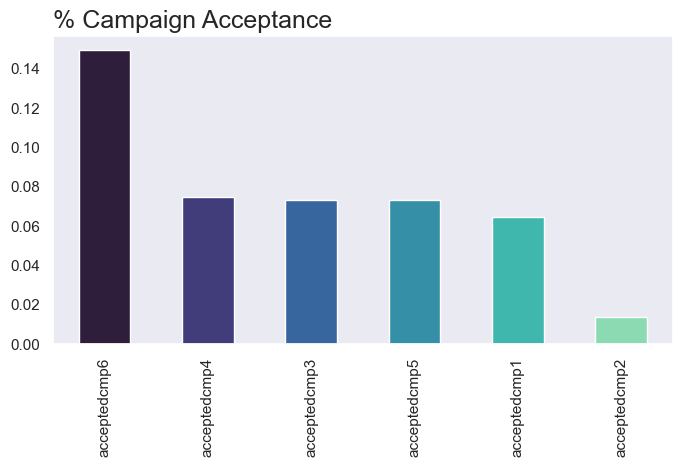

In [35]:
campaigns = df_copy.loc[:,'acceptedcmp3':'response'].drop('complain', axis=1)

# Rename response as acceptedcmp6 for more practicity
campaigns.rename(columns={'response':'acceptedcmp6'}, inplace=True)

# Plot the acceptance ratio for each campaign
fig, ax = plt.subplots(figsize=(8,4))
campaigns.mean().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette('mako'), 
                                                  ax=ax)
ax.set_title('% Campaign Acceptance', size=18, loc='left')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Campaign 2 had significantly lower acceptance.</li>
            <li>The last campaign had significantly higher acceptance.</li>
            <li>The rest of the campaigns had an acceptance rate of around 7%.</li>
        </ul>
    </span>
</div>

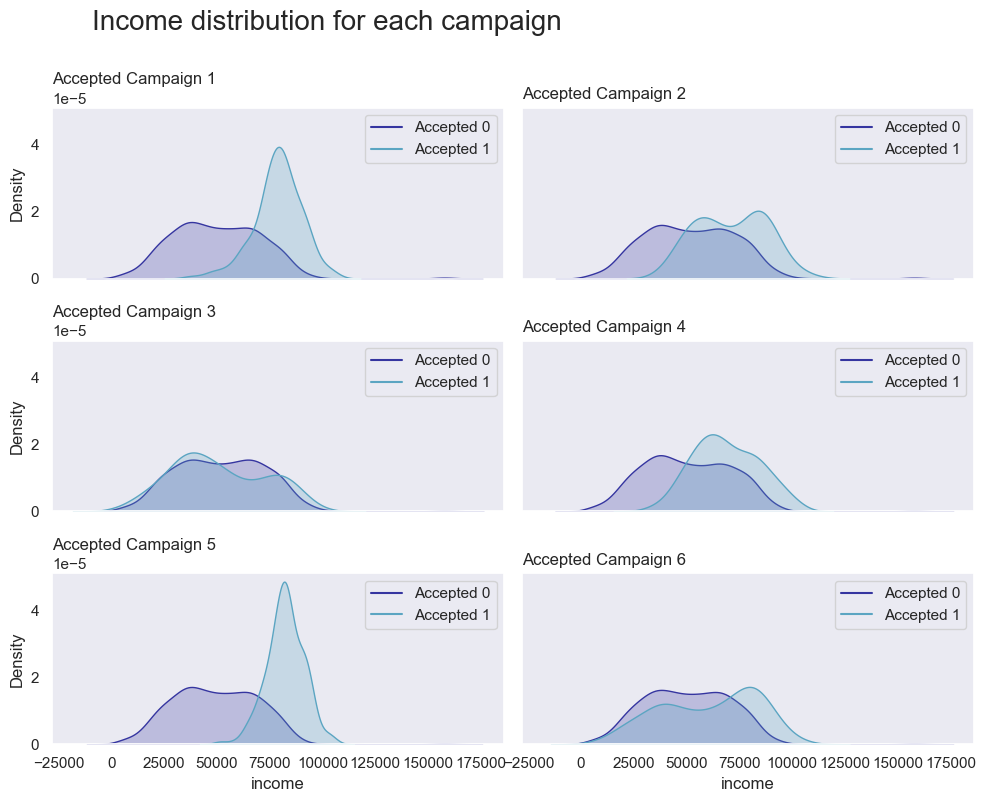

In [36]:
df_without_outliers.rename(columns={'response': 'acceptedcmp6'}, inplace=True)

fig, ax = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)
colors = ['#3535a0', '#5ba5c2']

for i, ax in enumerate(ax.flat):
    sns.kdeplot(data=df_without_outliers[df_without_outliers[f'acceptedcmp{i+1}'] == 0],
                x='income', shade=True, color=colors[0], label='Accepted 0', ax=ax)
    sns.kdeplot(data=df_without_outliers[df_without_outliers[f'acceptedcmp{i+1}'] == 1],
                x='income', shade=True, color=colors[1], label='Accepted 1', ax=ax)
    
    ax.set_title(f'Accepted Campaign {i + 1}', size=12, loc='left')
    custom_legend = [
        Line2D([0], [0], color=colors[0], lw=1.5, linestyle='-', label='Accepted 0'),
        Line2D([0], [0], color=colors[1], lw=1.5, linestyle='-', label='Accepted 1')
    ]
    ax.legend(handles=custom_legend)

plt.suptitle('Income distribution for each campaign',
                         x=0.1, y=1.0, fontsize=20, ha="left")
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>In nearly all the campaigns, the average income of individuals who accepted was noticeably higher than those who did not. You can even see it quite clearly in the visualizations.</li>
            <li>Customers with higher incomes are likely to be more accepting of marketing campaigns due to their financial ability to take advantage of offers and their potential interest in higher-value products.</li>
            <li>Interestingly, there doesn't appear to be any discernible pattern related to the year of birth.</li>
        </ul>
    </span>
</div>

**How many people accepted more than one campaign?**

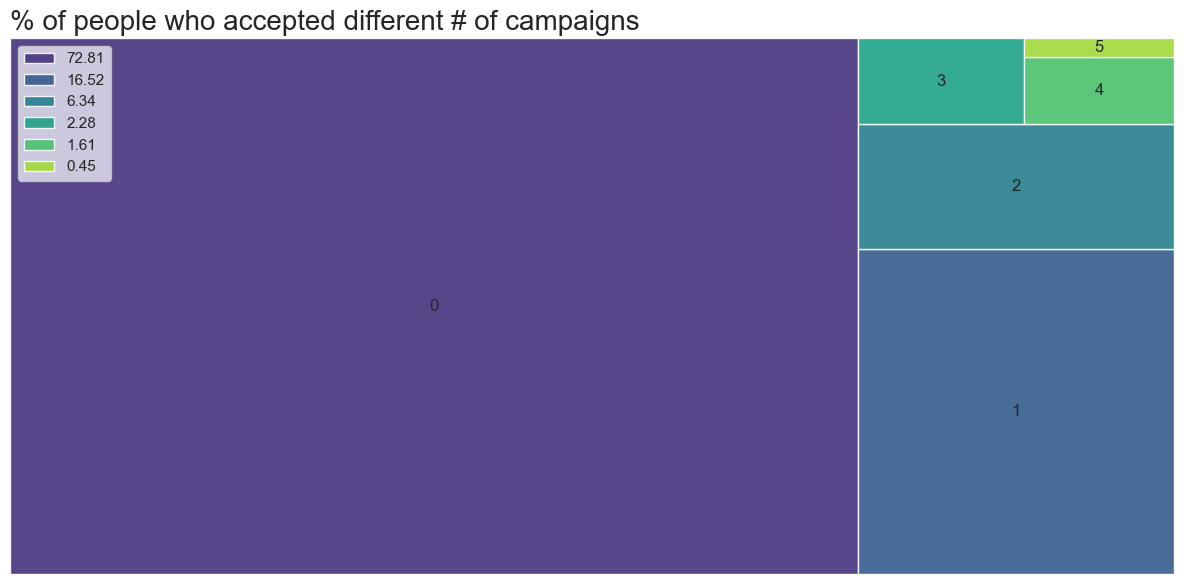

In [37]:
people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12,6))
squarify.plot(sizes=people_acceptance, label=people_acceptance.index,
              color=sns.color_palette('viridis',len(people_acceptance)),
              alpha=.9)
plt.legend(np.round(people_acceptance*100,2))
plt.axis('off')
plt.title('% of people who accepted different # of campaigns', loc='left', size=20)
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Approximately 73% of customers have never accepted even a single marketing campaign.</li>
            <li>Around 10% of customers have accepted more than 1.</li>
        </ul>
    </span>
</div>

**Is there a pattern in customers who accepted at least one campaign?**

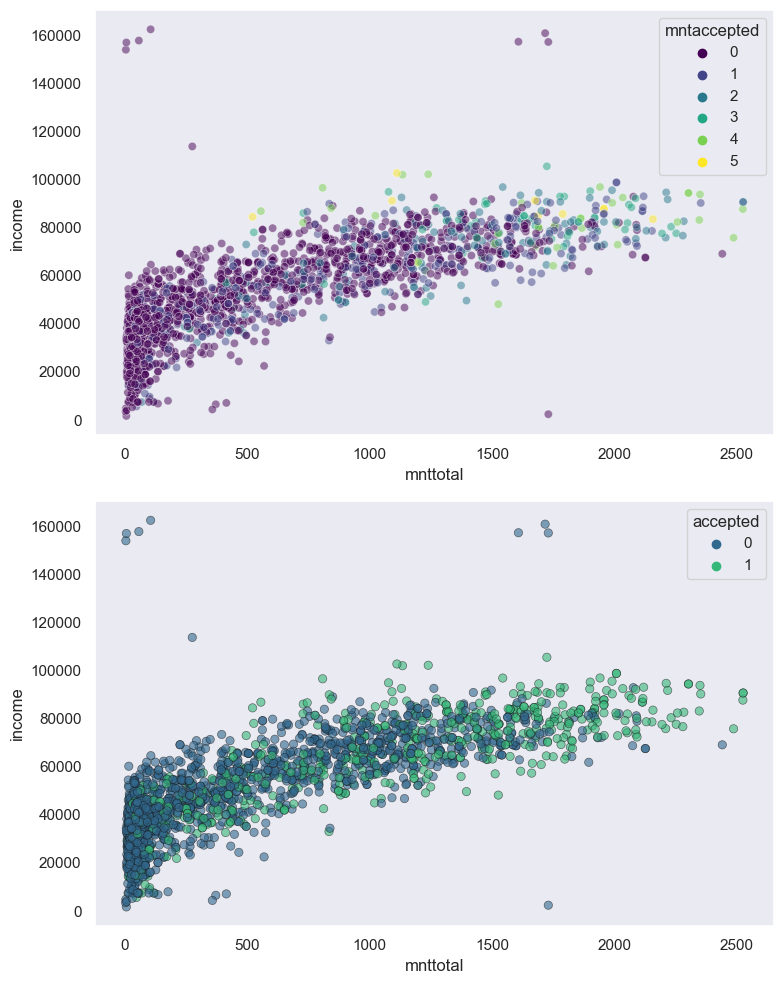

In [38]:
df_without_outliers = df_copy.loc[(df_copy.year_birth > 1940) & (df_copy.income < 200_000)]
df_without_outliers['mntaccepted'] = campaigns.sum(1)
df_without_outliers['accepted'] = df_without_outliers['mntaccepted'].apply(lambda x: 1 if x > 0 else x)

fig, ax = plt.subplots(2, figsize=(8,10))
sns.scatterplot(data=df_without_outliers,
                        x='mnttotal', y='income',
                        hue='mntaccepted',
                        palette='viridis',
                        alpha=.5,
                        ax=ax[0])


sns.scatterplot(data=df_without_outliers,
                        x='mnttotal', y='income',
                        hue='accepted',
                        palette='viridis',
                        alpha=.6,
                        edgecolor='k',
                        ax=ax[1])

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>We can clearly see a direct relationship between income levels and the quantity of products purchased.</li>
            <li>Customers with higher incomes are also more inclined to respond positively to marketing campaigns.</li>
            <li>Furthermore, those customers who have accepted a greater number of campaigns are more likely to make larger product purchases.</li>
        </ul>
    </span>
</div>

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestion:</b><br>
        <ul>
            <li>It would be prudent to focus marketing efforts more heavily on customers with higher incomes, as they are both more responsive to campaigns and tend to spend more.</li>
            <li>Additionally, the company might want to devise strategies to encourage campaign acceptance among a broader customer base to potentially boost overall sales.</li>
        </ul>
    </span>
</div>

**Is there a common demographic factor?**

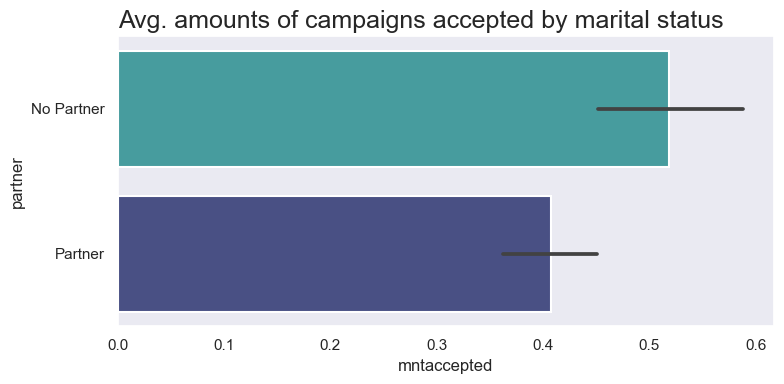

In [39]:
df_copy['mntaccepted'] = campaigns.sum(1)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='mntaccepted', y='partner', data=df_copy, palette='mako_r', linewidth=1.5)
ax.set_title('Avg. amounts of campaigns accepted by marital status', size=18, 
             loc='left')
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Individuals without a partner appear to be more receptive to marketing campaigns.</li>
    </span>
</div>

## 4.5 Complains

**How many customers have complained?**

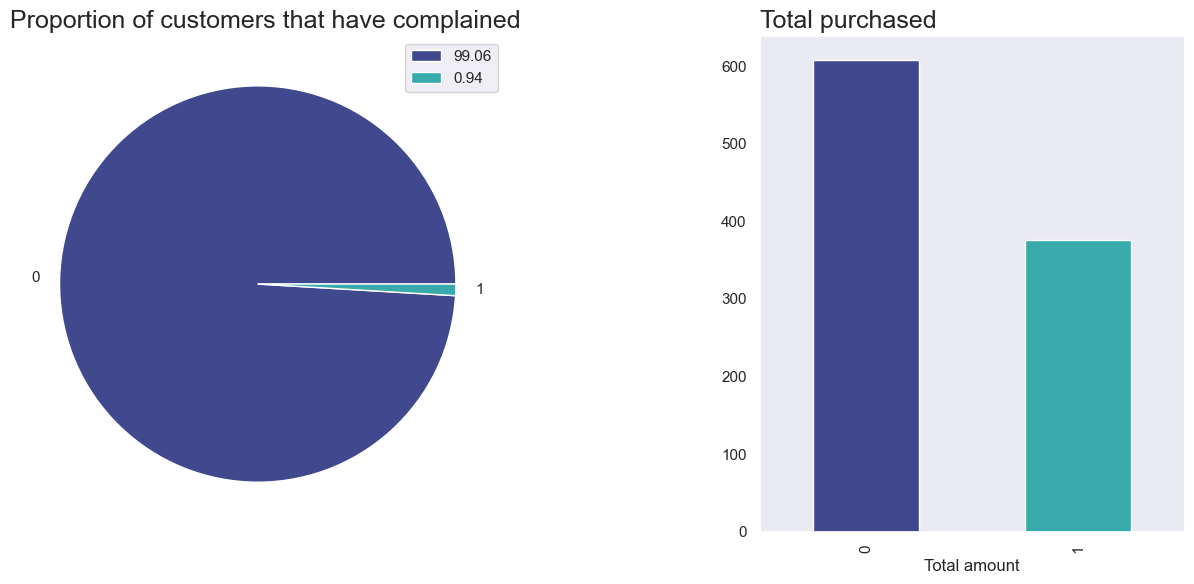

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

df_copy.loc[:, 'complain'].value_counts().plot(kind='pie', ax=axes[0], colors=sns.color_palette('mako', 2))
axes[0].set_title('Proportion of customers that have complained', size=18, loc='left')
axes[0].legend(np.round(df_copy.loc[:, 'complain'].value_counts(normalize=True) * 100, 2))
axes[0].axis('off')

df_copy.groupby('complain')['mnttotal'].mean().plot(kind='bar', color=sns.color_palette('mako', 2), ax=axes[1])
axes[1].set_title('Total purchased', size=18, loc='left')
axes[1].set_xlabel('Total amount')

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Less than 1% of customers have complained.</li>
            <li>As expected, customers who have complained have spent less.</li>
        </ul>
    </span>
</div>

<a id="5"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">5. Preprocessing the data</p>

## 5.1 Missing values treatment:
We could drop those rows due to the low amount of instances with missing values It won't affect significantly to the model result. However, I prefer another approach, leveraging in the `KNNImputer` algorithm of the Scikit-Learn package.

More info about the algorithm here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [41]:
df.isnull().sum().sort_values(ascending=False)[:1]

Income    24
dtype: int64

## 5.2 Outliers treatment:
Eliminating outlier values prior to applying clustering algorithms enhances performance. To refine data quality, a capping procedure will truncate extreme values beyond the 1th and 99th percentiles in numerical columns. This minimizes their impact on clustering and ensures a robust, accurate outcome.

In [42]:
def outliers_treatment(df):
    """Capping outliers"""
    df_num = df.select_dtypes(['number'])
    for i in df_num:
        low = df[i].quantile(.01)
        up = df[i].quantile(.99)
        df[i] = df[i].apply(lambda x: low if x < low else up if x > up else x)
    return df

## 5.3 Data Scaling & Formatting
In our data preprocessing workflow using Scikit-Learn, we will employ the `FunctionTransformer` to apply custom functions
to our dataset. Furthermore, we will utilize the `ColumnTransformer` to execute specific functions and treatments, such as
`KNNImputer`, `OneHotEncoder`, and `StandardScaler`.

To ensure data integrity and facilitate future data processing tasks, we will consolidate all these preprocessing steps into a
well-structured pipeline. This approach mitigates the risk of data leakage while promoting simplicity in subsequent data handling activities.



In [43]:
# Create the new columns
def modify_columns(df):
    """Creating previous columns"""
    df.columns = df.columns.str.lower()
    # Create new columns
    df['younghome'] = df.kidhome + df.teenhome
    not_graduated = ['Basic','2n cycle']
    couple = ['Married','Together']
    df['graduated'] = df['education'].apply(lambda x: 'Not Graduated' if x in not_graduated else 'Graduated')
    df['partner'] = df['marital_status'].apply(lambda x: 'Partner' if x in couple else 'No Partner')
    df['mnttotal'] = df.loc[:,'mntwines':'mntgoldprods'].sum(1)
    df['mntaccepted'] = pd.concat([df.loc[:,'acceptedcmp3':'acceptedcmp2'],df.loc[:,'response']], axis=1).sum(1)
    df['accepted'] = df['mntaccepted'].apply(lambda x: 1 if x > 0 else 0)
    df['age'] = max(pd.to_datetime(df['dt_customer']).dt.year) - df['year_birth']
    df['age_category'] = age_clusters
    return df

# Apply FunctionTransformer for the functions
mod_columns = FunctionTransformer(modify_columns)
log_transformer = FunctionTransformer(lambda x: np.log(x))

# Missing values
knn = KNNImputer(n_neighbors=3)

# Outliers treatment
capping_out = FunctionTransformer(outliers_treatment)

# Data Scaling and Formatting
sc = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# Create the column transformer
knn_sc_log = make_pipeline(log_transformer, sc, knn)
sc_log = make_pipeline(log_transformer, sc)

ct = make_column_transformer(
                             (knn_sc_log,['income']),
                             (sc_log,['mnttotal']),
                             (ohe,['partner','graduated']),
                              remainder='drop'
                              )
                              
# Create the pipeline
pipe = make_pipeline(
                     mod_columns,
                     capping_out,
                     ct
                     )
pipe

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function modify_columns at 0x000002221B1F7100>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function outliers_treatment at 0x000002221B1CC720>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<func...)),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  ['income']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022217F3ADE0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['mnttotal']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['partner', 'graduated'])]))])

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Note:</b><br>
        After carefully analyzing the data from a business standpoint and going through several iterations, we found that using fewer categories will give us a better clustering model. This simpler approach makes it easier to understand the clusters and still results in good performance scores like silhouette and Davies-Bouldin. This decision reflects a practical and effective data science strategy.
    </span>
</div>

**Apply the pipeline to the original dataset**

In [44]:
df_copy_1 = df.copy()

df_prep = pipe.fit_transform(df_copy_1)

**Let's take a look of the first row!**

In [45]:
df_prep[:1]

array([[0.4455789 , 1.20390221, 1.        , 0.        , 1.        ,
        0.        ]])

**Get the columns names after applying the pipeline for further analysis**

In [46]:
columns = ['income','mnttotal']

ohe_columns = pipe.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out()

for column in ohe_columns:
    columns.append(column)

**Check if there's no missing values:**

In [47]:
np.isnan(df_prep).sum()

0

<a id="6"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">6. Modeling</p>

Our data exploration has focused on deriving valuable insights and offering practical business suggestions.
Now, we are enhancing our analysis by applying clustering algorithms to reveal intricate patterns and gain deeper insights into the data's complexities.

## 6.1 K-Means

**Determine the optimal number of clusters using the silhouette diagrams and elbow method**

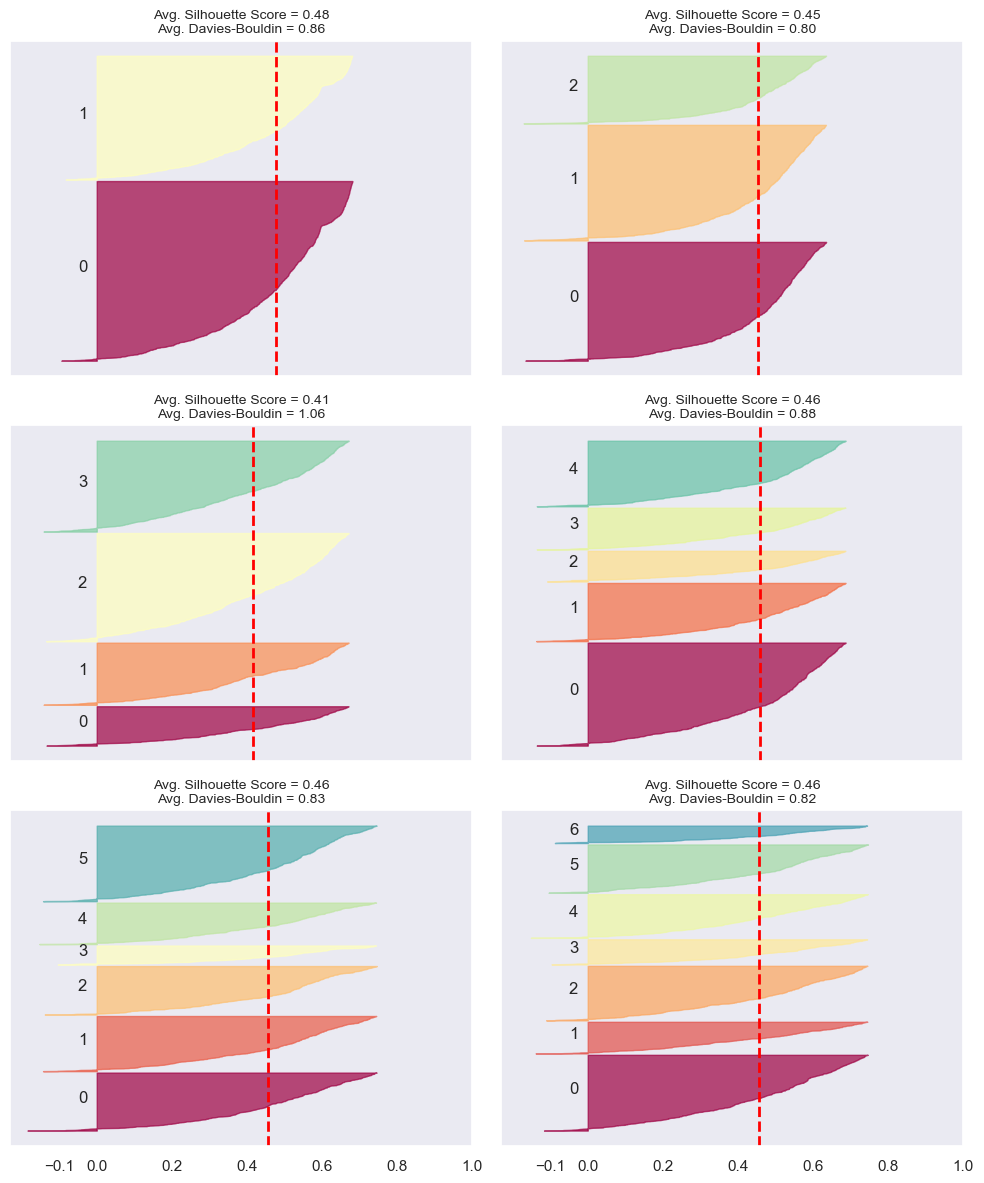

In [48]:
inertias = []
silhouette_scores = []
davies = []
k_values = range(2,8)

fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True)

for i, ax in enumerate(axes.flatten()):
    k = k_values[i]
    # Fit the model with k clusters
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=0, algorithm='lloyd')
    kmeans.fit(df_prep)
    # Compute inertia and silhouette scores
    silhouette_values = silhouette_samples(df_prep, kmeans.labels_)
    silhouette_values.sort()
    silhouette_avg = silhouette_score(df_prep, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    inertias.append(kmeans.inertia_)
    davies.append(davies_bouldin_score(df_prep, kmeans.labels_))

    # Add a silhouette plot for each cluster
    y_lower = 10
    ax.set_title(f"Avg. Silhouette Score = {silhouette_avg:.2f}\nAvg. Davies-Bouldin = {davies_bouldin_score(df_prep, kmeans.labels_):.2f}", 
                 size=10)
    for j in range(k):
        ith_cluster = silhouette_values[kmeans.labels_ == j]
        size_cluster_j = ith_cluster.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.get_cmap("Spectral")(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)

    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Graph Interpretation:</b> The height of the shape indicates the number of instances contained in the cluster, and its width represents the ordered silhouette coefficients of the instances in the cluster (wider is better).
    </span>
</div>


<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Apparently we reach a peak in the silhouette score between 5 and 7 clusters and then start to decrease slowly.</li>
            <li>While we do achieve satisfactory results when <code>k=2</code>, it aligns better with a business perspective to consider 5 or 3 over 2 clusters.</li>
        </ul>
    </span>
</div>

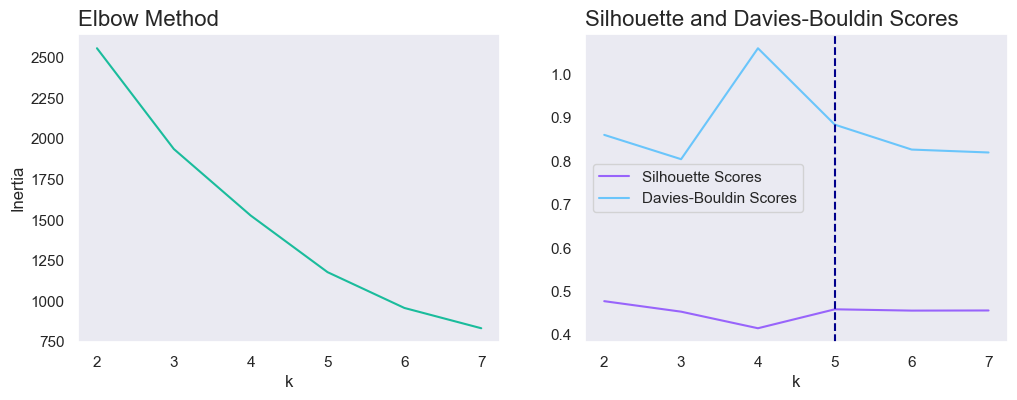

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the Elbow Method
sns.lineplot(x=range(2, 8), y=inertias, color='#1ABC9C', ax=ax[0])
ax[0].set_title('Elbow Method', size=16, loc='left')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

# Plot Silhouette and Davies-Bouldin Scores
sns.lineplot(x=range(2, 8), y=silhouette_scores, color='#762CFF', label='Silhouette Scores', alpha=0.7, ax=ax[1])
sns.lineplot(x=range(2, 8), y=davies, color='#34B6FF', label='Davies-Bouldin Scores', alpha=0.7, ax=ax[1])
ax[1].set_title('Silhouette and Davies-Bouldin Scores', size=16, loc='left')
ax[1].set_xlabel('k')
ax[1].legend()
ax[1].axvline(5, linewidth=1.5, color='darkblue', linestyle='--')

plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>There isn't a distinct elbow point in the graph; some might argue it's at <code>k=3</code>, while others could suggest <code>k=5</code>.</li>
            <li>After <code>k=4</code>, there's a noticeable upward trend in the silhouette score and a downward trend in the Davies-Bouldin Score.</li>
            <li>Interestingly, when <code>k=3</code>, we achieve the lowest Davies-Bouldin Score within the range of 'k' values considered, and we also maintain a respectable Silhouette score.</li>
        </ul>
    </span>
</div>

In [50]:
kmeans = KMeans(n_clusters=5, n_init=50, random_state=0)
kmeans_labels = kmeans.fit_predict(df_prep)
print(f"Silhouette Score: {silhouette_score(df_prep, kmeans_labels)}")
print('Davies-Bouldin Score: ',davies_bouldin_score(df_prep, kmeans_labels))

Silhouette Score: 0.4586128513601604
Davies-Bouldin Score:  0.8842415011596625


## 6.2 DBSCAN

In [51]:
dbscan = DBSCAN(eps=0.3, min_samples=50, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_prep)

print(f"Silhouette Score: {silhouette_score(df_prep, dbscan_labels)}")
print('Davies-Bouldin Score: ',davies_bouldin_score(df_prep, dbscan_labels))

Silhouette Score: 0.29134507461043874
Davies-Bouldin Score:  1.086719640914308


## 6.3 Hierarchical Clustering

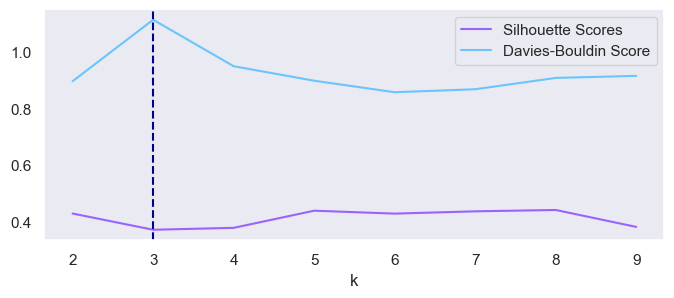

In [52]:
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=2.0)
agg_cluster.fit(df_prep)

sil_score = []
davies = []
for k in range(2,10):
    if k < len(agg_cluster.children_):
        agg_labels = AgglomerativeClustering(n_clusters=k).fit_predict(df_prep)
        sil_score.append(silhouette_score(df_prep,agg_labels))
        davies.append(davies_bouldin_score(df_prep, agg_labels))
    else:
        agg_labels = agg_cluster.labels_
        print('K: ',k)
        print('Silhouette score: ',silhouette_score(df_prep,agg_labels))
        print('Davies-Bouldin Score: ',davies_bouldin_score(df_prep, agg_labels))

# Let's plot the scores for each cut-off number
plt.figure(figsize=(8,3))
sns.lineplot(x=range(2, 10), y=sil_score, color='#762CFF', label='Silhouette Scores', alpha=.7)
sns.lineplot(x=range(2, 10), y=davies, color='#34B6FF', label='Davies-Bouldin Score', alpha=.7)
plt.axvline(3, linewidth=1.5, color='darkblue', linestyle='--')
plt.xlabel('k')

plt.show()

In [53]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(df_prep)
print('Silhouette score: ',silhouette_score(df_prep,agg_labels))
print('Davies-Bouldin Score: ',davies_bouldin_score(df_prep, agg_labels))

Silhouette score:  0.3729004131532732
Davies-Bouldin Score:  1.1115304294815544


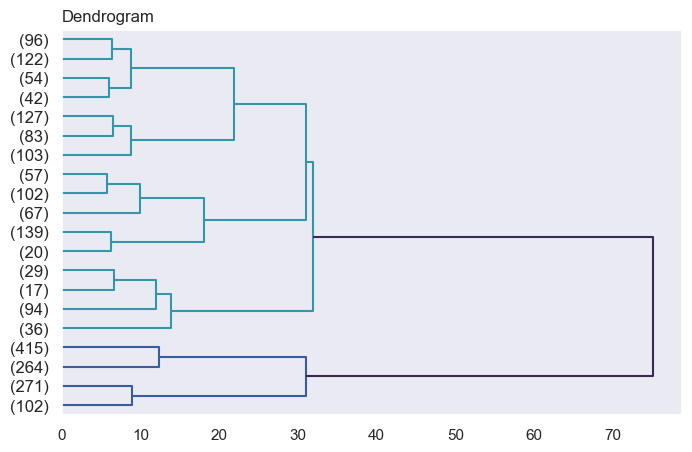

In [54]:
linkage_matrix = linkage(df_prep, method='ward')

plt.figure(figsize=(8,5))
dendrogram(linkage_matrix, orientation='right', truncate_mode='lastp', p=20)
plt.title("Dendrogram", loc='left')
plt.show()

<a id="7"></a>
# <p style="background-color:#616EDD;font-family:sans-serif;color:#FFFFFF;font-size:120%;text-align:left;border-radius:12px 12px;">7. Explore the clusters results</p>
The KMeans algorithm has demonstrated superior performance in terms of silhouette and Davies-Bouldin scores,
suggesting its effectiveness for our clustering task.

**Concatenate cluster classes with the original dataset**

In [55]:
df_clustered = pd.concat([df_copy_1.reset_index().drop('index', axis=1), 
                          pd.Series(kmeans_labels, name='KMeans', dtype='object')],
                          axis=1)

# Create the previous columns
modify_columns(df_clustered)

df_clustered.head(3)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,younghome,graduated,partner,mnttotal,mntaccepted,accepted,age,age_category,kmeans
0,5524.0,1957.0,Graduation,Single,58138.0,0,0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0,0,0,0,0,0.0,3,11,1,0,Graduated,No Partner,1617.0,1,1,57.0,adult,1
1,2174.0,1954.0,Graduation,Single,46344.0,1,1,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0.0,3,11,0,2,Graduated,No Partner,27.0,0,0,60.0,adult,3
2,4141.0,1965.0,Graduation,Together,71613.0,0,0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0.0,3,11,0,0,Graduated,Partner,776.0,0,0,49.0,adult,0


**Let's create a custom color palette to indentify clusters more easily**

In [56]:
custom_colors = {
    0: '#471164FF',
    1: '#3B528BFF',
    2: '#35B779FF',
    3: '#AADC32FF',
    4: '#FDE725FF'
}

colors = [custom_colors[cluster] for cluster in sorted(df_clustered['kmeans'].unique())]
custom_palette_kmeans = sns.set_palette(colors)

### **How many customers do we have in each cluster?**

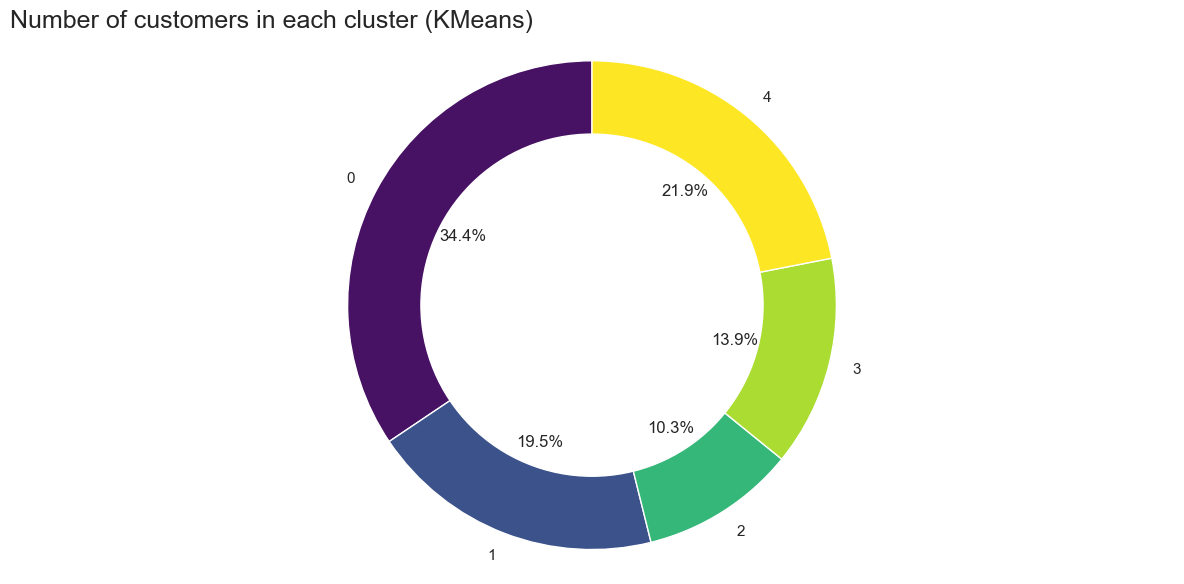

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Number of customers in each cluster (KMeans)', loc='left', size=18)
kmeans_counts = df_clustered['kmeans'].value_counts().sort_index()
pie = ax.pie(kmeans_counts, labels=kmeans_counts.index, autopct='%1.1f%%', startangle=90,
             wedgeprops=dict(width=0.4, edgecolor='w'), colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <li>Our clusters exhibit a relatively balanced distribution, aligning with our desired outcome in the clustering process.</li>
    </span>
</div>


### **Income vs. Total amount purchased**

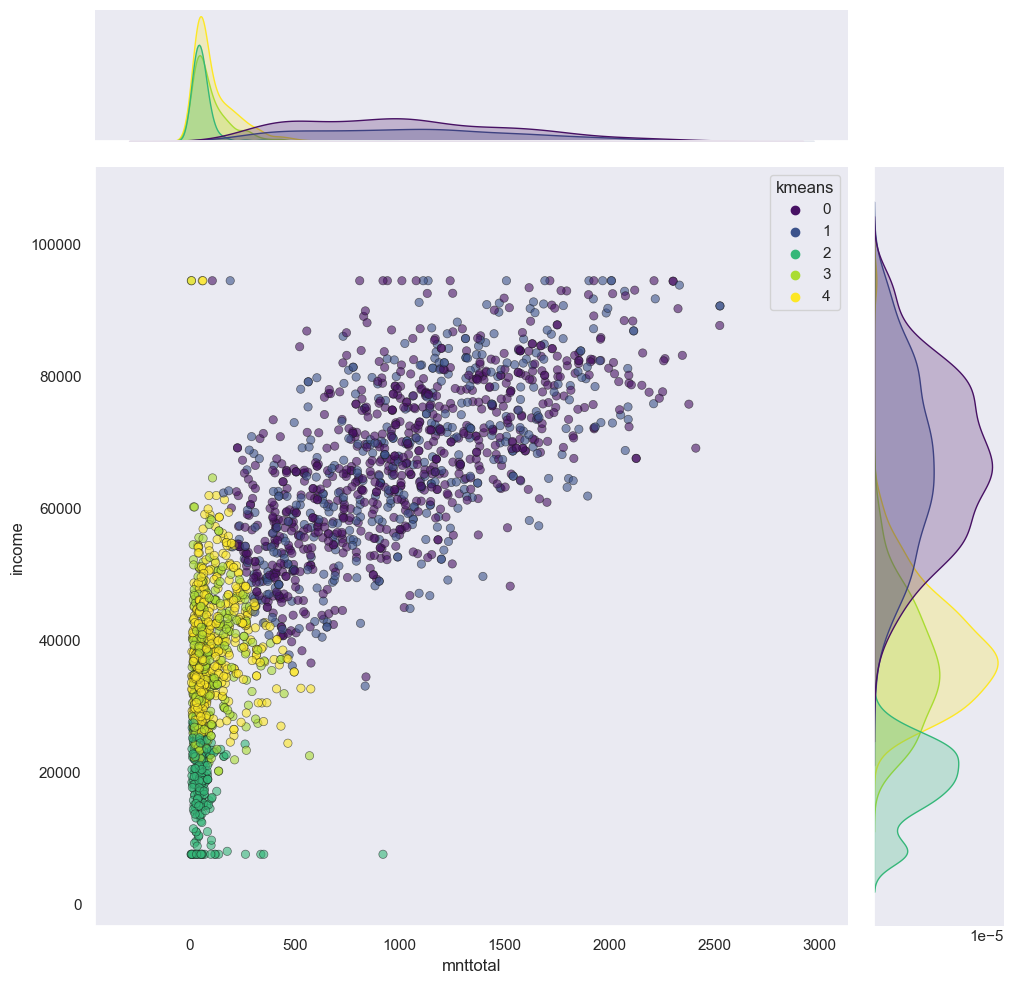

In [58]:
# KMeans
sns.jointplot(data=df_clustered,
                        x='mnttotal', y='income',
                        hue='kmeans',
                        palette=sns.color_palette(custom_palette_kmeans),
                        alpha=.6,
                        height=10,
                        edgecolor='k')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <li>Groups 0 and 1 appear to buy more products and have higher average incomes.</li>
        <li>Group 2 has low income and buys fewer products.</li>
        <li>Groups 3 and 4, while having higher incomes, don't typically purchase a large quantity of products on average.</li>
    </span>
</div>

## 7.2 Demographic Charateristics

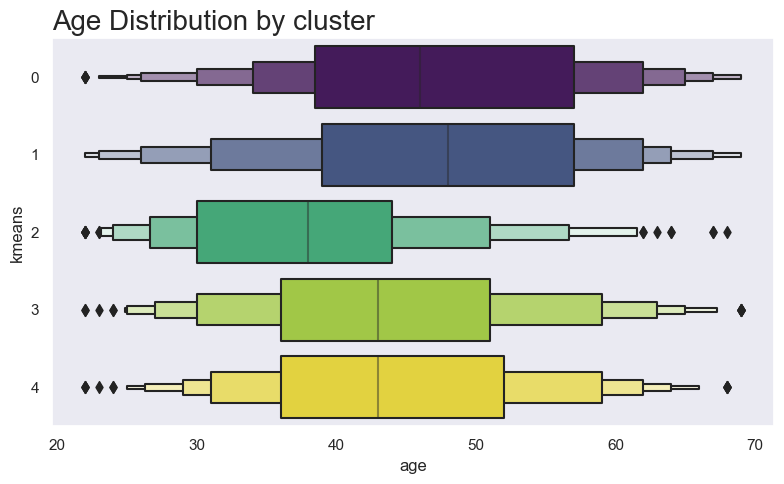

In [59]:
fig, ax = plt.subplots(figsize=(8,5))

# KMeans
sns.boxenplot(x='age', y='kmeans', data=df_clustered, linewidth=1.5, orient='h')
ax.set_title('Age Distribution by cluster', loc='left', size=20)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <li>Groups 0 and 1 consist of the oldest customers, which aligns with our previous findings that this age group tends to make more purchases and have higher incomes.</li>
        <li>Group 2 includes the youngest customers</li>
        <li>Groups 3 and 4 primarily comprise middle-aged adults.</li>
    </span>
</div>


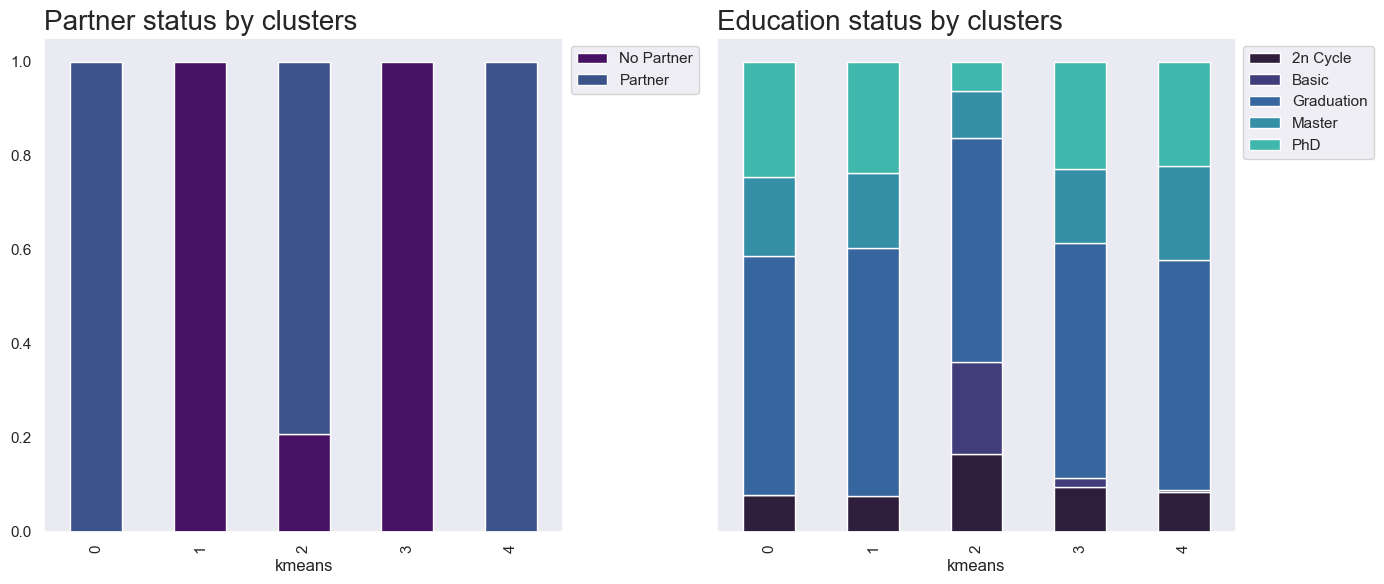

In [60]:
group_by_partner = df_clustered.groupby('kmeans')['partner'].value_counts(normalize=True).unstack()
group_by_graduated = df_clustered.groupby('kmeans')['education'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(1,2, figsize=(14,6), sharey=True)

group_by_partner.plot(kind='bar', 
                      stacked=True,
                     ax=ax[0])

ax[0].set_title('Partner status by clusters', size=20, loc='left')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

group_by_graduated.plot(kind='bar', 
                      stacked=True,
                     ax=ax[1],
                       color=sns.color_palette('mako'))

ax[1].set_title('Education status by clusters', size=20, loc='left')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <li>Groups 0 and 4 consist completely of customers without partner.</li>
        <li>Group 1 and 3 consist completely of customers with partner.</li>
        <li>Group 2 consists mostly of customers with partner.</li>
        <li>Education levels are largely consistent across all groups, except for Group 2, where the number of non-graduated customers is notably higher, likely due to the group's relatively younger age.</li>
    </span>
</div>

## 7.3 Spending behavior and receptivity to campaigns

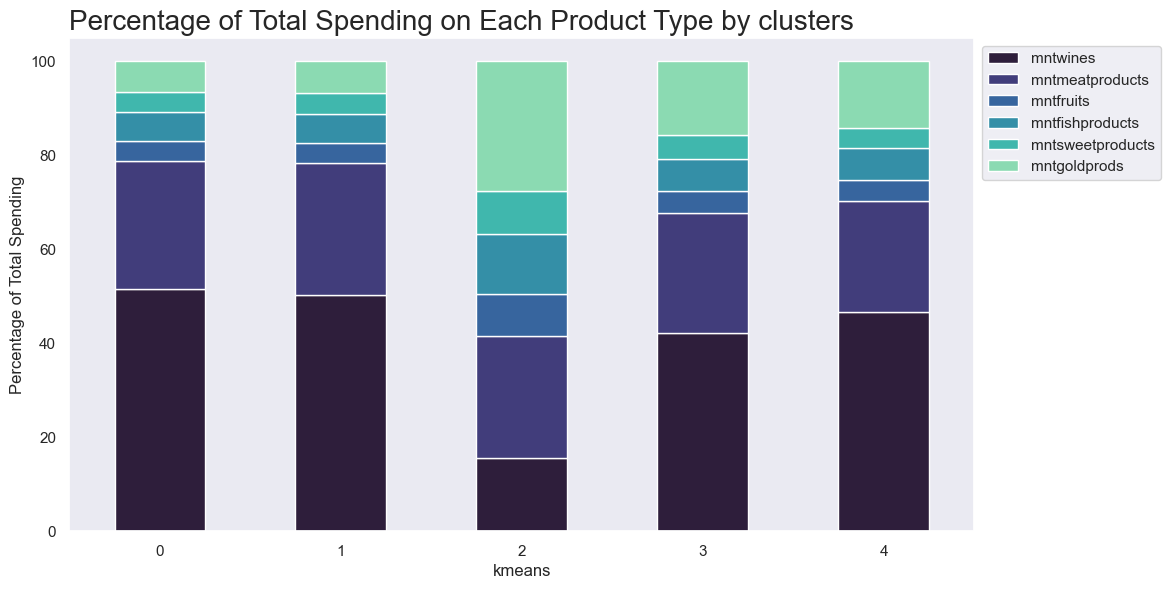

In [61]:
prod_columns = ['mntwines','mntmeatproducts','mntfruits','mntfishproducts',
                'mntsweetproducts','mntgoldprods']

df_grouped = df_clustered.groupby('kmeans')[prod_columns].mean()

df_percentage = df_grouped.divide(df_grouped.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', ylabel='Percentage of Total Spending', 
                   figsize=(10, 6),
                   stacked=True,
                   color=sns.color_palette('mako',6))

ax.set_title('Percentage of Total Spending on Each Product Type by clusters', size=20, loc='left')

plt.tight_layout()
plt.xticks(rotation=0)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <li>Spending patterns remain relatively similar across all groups, with the exception of Group 2, which spent less on wines but allocated more of their budget to gold products.</li>
        <li>Groups 0 and 1 favor spending more on wine and meat over gold products, potentially indicating an age-related trend. Younger individuals may lean towards investing in gold products, while older individuals tend to prioritize perishable goods.</li>
    </span>
</div>


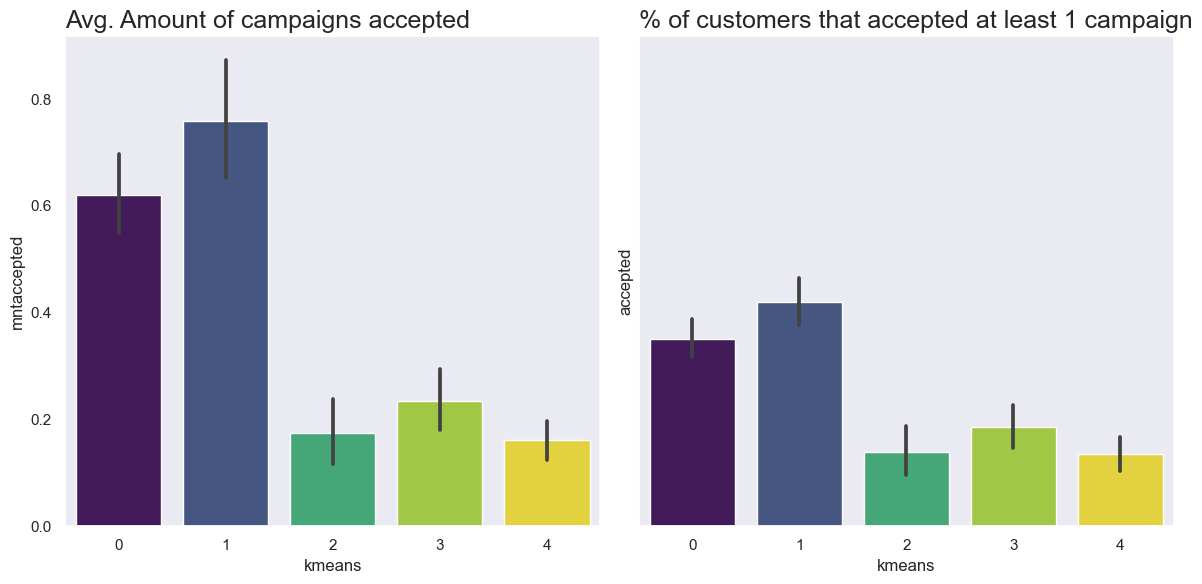

In [62]:
avg_mntaccepted = df_clustered.groupby('kmeans')['mntaccepted'].mean()
percentage_accepted = df_clustered.groupby('kmeans')['accepted'].mean()

fig , ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)

sns.barplot(data=df_clustered, x='kmeans', y='mntaccepted',
                     ax=ax[0])
ax[0].set_title('Avg. Amount of campaigns accepted', size=18, loc='left')

sns.barplot(data=df_clustered, x='kmeans', y='accepted',
                     ax=ax[1])
ax[1].set_title('% of customers that accepted at least 1 campaign', size=18, loc='left')

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <li>Groups 0 and 1 display a significantly higher propensity to accept campaigns and accept them in larger numbers.</li>
        <li>The remaining groups do not exhibit a noteworthy difference in this regard.</li>
    </span>
</div>

## 7.4 Plot the clusters in 3D

In [63]:
def plot_3d(elev, azim):
    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(111, projection='3d')

    for clase, color in custom_colors.items():
        df_3d = df_clustered[df_clustered.income < 120_000]
        subset = df_3d[df_3d.kmeans == clase]
        ax.scatter(subset['mnttotal'], subset['income'], subset['mntaccepted'], 
                   c=color, label=clase, alpha=.7)

    ax.set_zlim(0, 5)
    ax.view_init(elev=elev, azim=azim)

    ax.set_facecolor('#EAEBF2')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlabel('MntTotal', fontsize=14)
    ax.set_ylabel('Income', fontsize=14)
    ax.set_zlabel('MntAccepted', fontsize=14)
    ax.set_title('Clusters in 3D', fontsize=22)

    legend = ax.legend()
    for text in legend.get_texts():
        text.set_fontsize(12)

    plt.show()

interact(plot_3d, elev=(-90, 90), azim=(0, 360))

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90), IntSlider(value=180, descriptio…

<function __main__.plot_3d(elev, azim)>

## 7.5 Results

<img src='https://raw.githubusercontent.com/CeloCruz/CustomerSegmentation/main/CustomersSegments.jpg'>